In [29]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np


# plt.rcParams["font.family"] = ["SimHei"]
# plt.rcParams['axes.unicode_minus'] = False

# df = pd.read_excel('Dry_Bean_Dataset.xlsx', index_col=0)
# y = df['Class']
# X = df.iloc[:,:-1]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 对目标数据进行编码
# encoder = LabelEncoder()
# y_encoded = encoder.fit_transform(y)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel('Dry_Bean_Dataset.xlsx')

# 检查并处理缺失值,无缺失值
print(df.isnull().sum())
df = df.dropna()

# 特征标准化
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_std = StandardScaler().fit_transform(X)
df_scaled = pd.DataFrame(X_std, columns=X.columns)
df_scaled['Class'] = y

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_std, y_encoded, test_size=0.3, random_state=42)

# df_scaled.to_csv('DryBeanDataset/Dry_Bean_Dataset_preprocessed.csv', index=False)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER



training set Evaluation outcome:
Accuracy: 0.9255
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       927
      BOMBAY       1.00      1.00      1.00       361
        CALI       0.94      0.95      0.94      1151
    DERMASON       0.92      0.92      0.92      2503
       HOROZ       0.96      0.95      0.96      1340
       SEKER       0.95      0.95      0.95      1408
        SIRA       0.86      0.87      0.86      1837

    accuracy                           0.93      9527
   macro avg       0.94      0.94      0.94      9527
weighted avg       0.93      0.93      0.93      9527



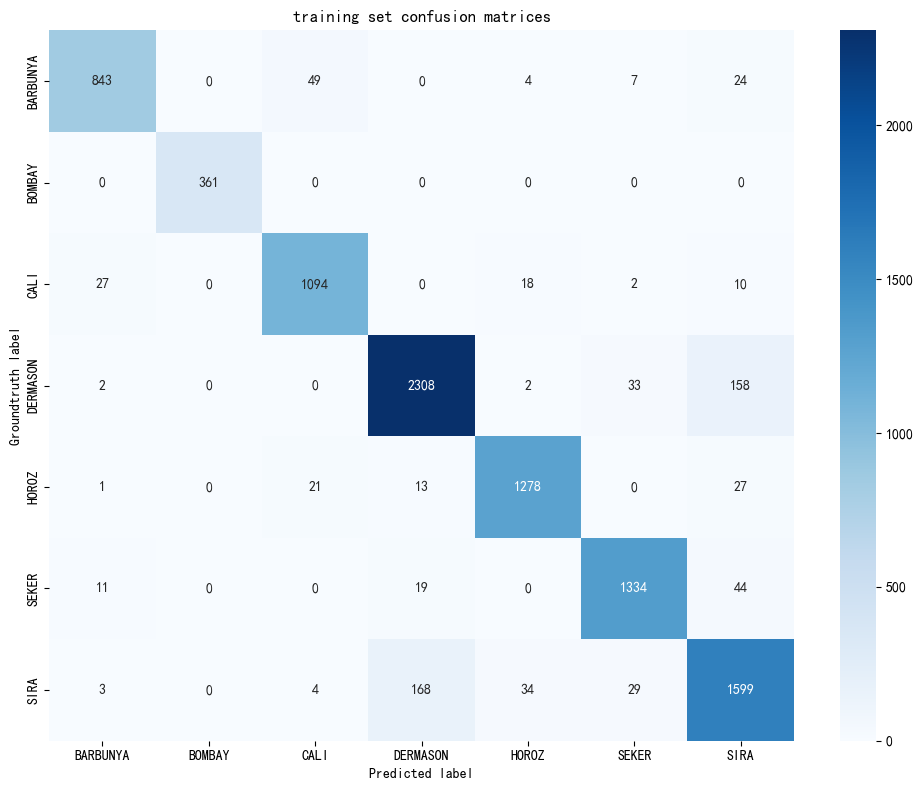


testing set Evaluation outcome:
Accuracy: 0.9229
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.91       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.94      0.93      0.93       479
    DERMASON       0.93      0.90      0.92      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER       0.95      0.94      0.94       619
        SIRA       0.84      0.90      0.87       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



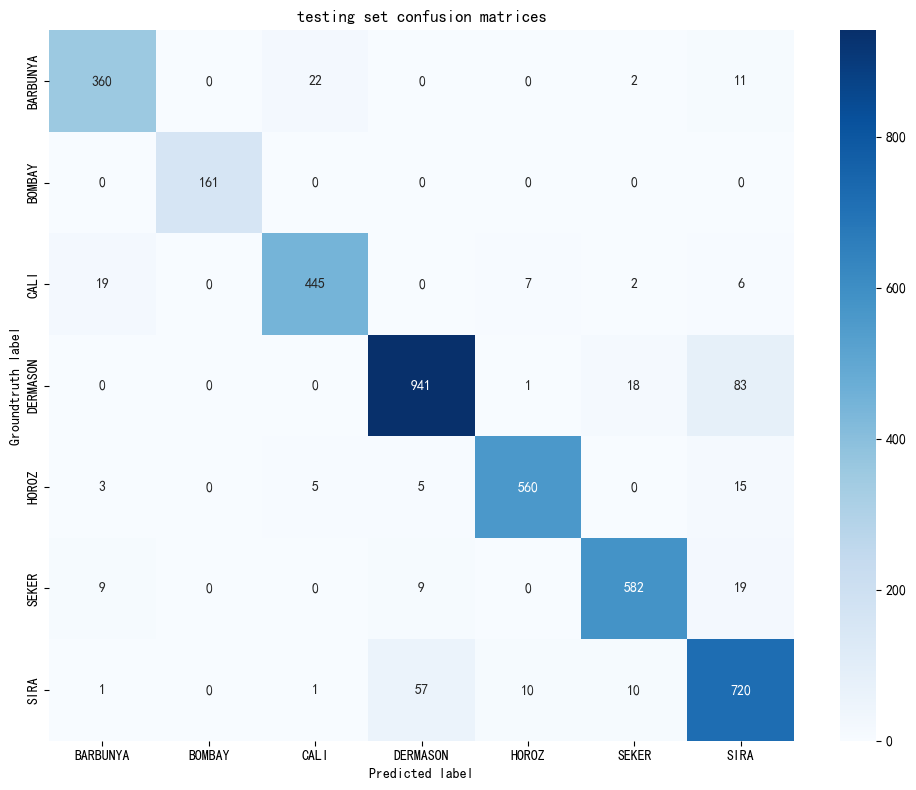


entire set Evaluation outcome:
Accuracy: 0.9247
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.93      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.94      0.94      0.94      1630
    DERMASON       0.92      0.92      0.92      3546
       HOROZ       0.96      0.95      0.96      1928
       SEKER       0.95      0.95      0.95      2027
        SIRA       0.85      0.88      0.87      2636

    accuracy                           0.92     13611
   macro avg       0.94      0.94      0.94     13611
weighted avg       0.93      0.92      0.92     13611



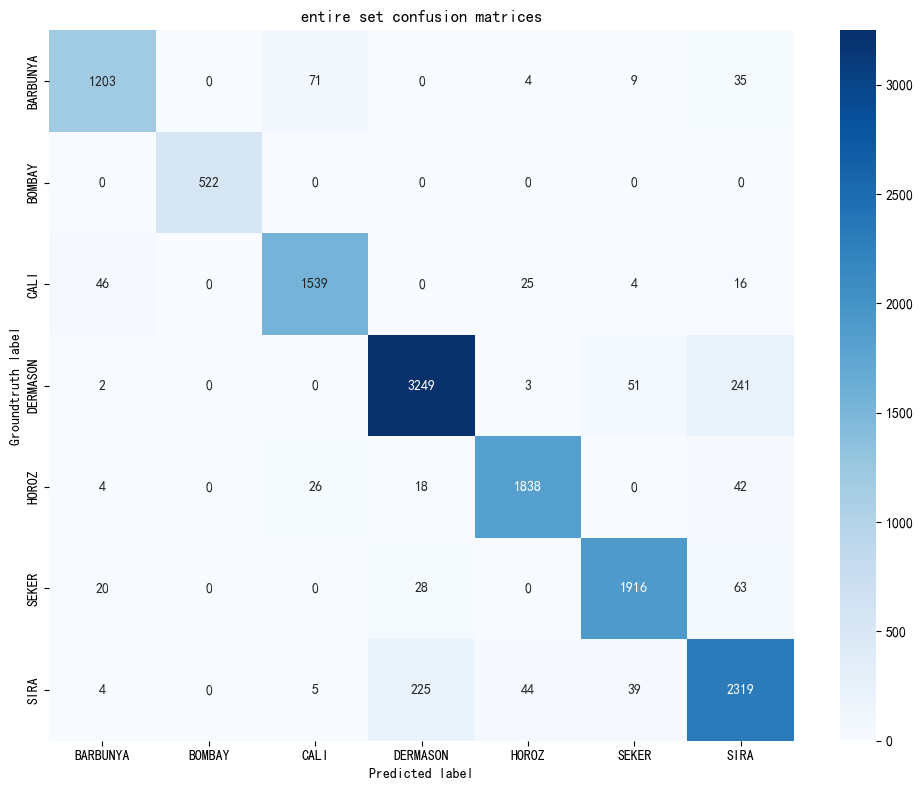

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 评估
def evaluate_dataset(X, y, dataset_name, model, encoder):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    
    print(f"\n{dataset_name}Evaluation outcome:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y, y_pred, target_names=encoder.classes_))
    
    # 混淆矩阵
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=encoder.classes_,
                yticklabels=encoder.classes_)
    plt.xlabel('Predicted label')
    plt.ylabel('Groundtruth label')
    plt.title(f'{dataset_name}confusion matrices')
    plt.tight_layout()
    plt.show()
    
    return accuracy, cm

train_accuracy, train_cm = evaluate_dataset(X_train, y_train, "training set ", model, encoder)

test_accuracy, test_cm = evaluate_dataset(X_test, y_test, "testing set ", model, encoder)

all_accuracy, all_cm = evaluate_dataset(X_std, y_encoded, "entire set ", model, encoder)

# print("\n=== 预测结果解释 ===")
# print("\n1. 训练集与测试集对比:")
# print(f"- 训练集准确率: {train_accuracy:.4f}")
# print(f"- 测试集准确率: {test_accuracy:.4f}")
# if abs(train_accuracy - test_accuracy) < 0.05:
#     print("- 模型表现: 训练集和测试集准确率接近，模型没有明显的过拟合或欠拟合。")
# elif train_accuracy > test_accuracy:
#     print("- 模型表现: 训练集准确率高于测试集，可能存在轻微过拟合，但差距不大。")
# else:
#     print("- 模型表现: 测试集准确率高于训练集，可能是数据划分随机性导致，或模型复杂度不足。")

# print("\n2. 各类别表现分析:")
# for i, cls in enumerate(encoder.classes_):
#     precision = train_cm[i, i] / train_cm[:, i].sum() if train_cm[:, i].sum() > 0 else 0
#     recall = train_cm[i, i] / train_cm[i, :].sum() if train_cm[i, :].sum() > 0 else 0
#     #f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
#     print(f"- {cls}:")
#     print(f"  精确率: {precision:.4f} - 正确预测为{cls}的比例")
#     print(f"  召回率: {recall:.4f} - 实际为{cls}的样本中被正确预测的比例")
#     #if f1 < 0.8:
        #print(f"  → 注意: {cls}的F1分数较低({f1:.4f})，模型对该类别的区分能力有待提高。")

# print("\n3. 混淆矩阵分析:")
# print("- 主对角线的值越高，说明模型对该类别的识别能力越强。")
# print("- 非主对角线的值表示模型错误分类的情况，可重点关注错误较多的类别对。")

# print("\n4. 模型适用性:")
# print("- 逻辑回归是线性模型，适用于特征与类别之间存在线性关系的场景。")
# print("- 如果决策边界图显示类别之间存在复杂的非线性关系，可能需要考虑更复杂的模型。")

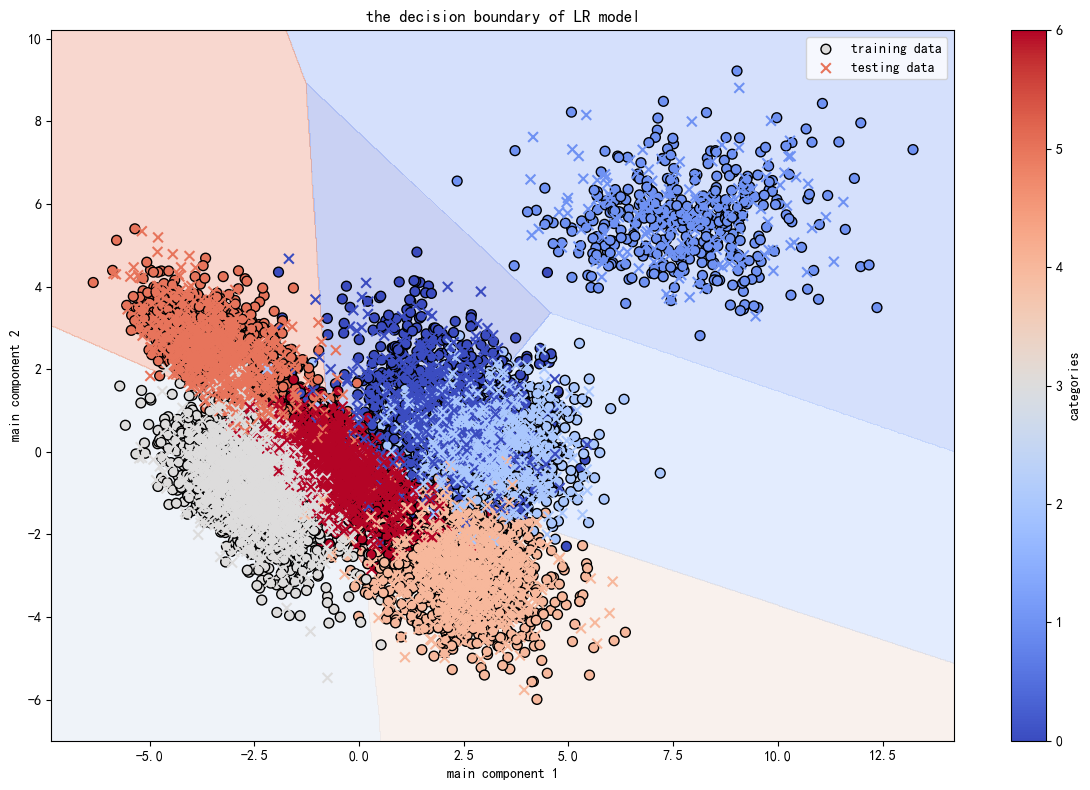

In [9]:
#  可视化决策边界（降维到二维）
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# 新2d模型
model_2d = LogisticRegression(max_iter=1000)
model_2d.fit(X_train_2d, y_train)

# 创建网格
h = 0.02  
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 预测类别
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 决策边界
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# 训练数据点
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, 
            cmap=plt.cm.coolwarm, edgecolors='k', s=50, label='training data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, 
            cmap=plt.cm.coolwarm, marker='x', s=50, label='testing data')

plt.colorbar(label='categories')
plt.legend()
plt.xlabel('main component 1')
plt.ylabel('main component 2')
plt.title('the decision boundary of LR model')
plt.tight_layout()
plt.show()
